## NLP Assignment 4
Harsh Kashyap
101917088
CSE4

### Sentiment Analysis

### Sentiment of Routine

In [ ]:
import pandas as pd

df = pd.read_pickle('pickle\corpus.pkl')
df

,Transcript,Full Name
Amer_Mohammed,[quirky flute music playing]\r\n [single note ...,Amer Mohammed
Dave_2,"June 6, 2020\r\n 8:46 is a performance special...",Dave Chappelle
Dave_Chappelle,[audience murmuring]\r\n [murmuring continues]...,Ch. Dave
Drew_Michael_1,“This is the latest I’ve stayed up in a long t...,Drew Michael
Drew_Michael_2,(EMOTIONAL MUSIC PLAYING)\r\n (MUSIC ENDS)\r\n...,M. Drew
Jim_Gaffigan,"Thank you! Thank you! Oh, my gosh. Thank you s...",Jim Gaffigan
Kathleen,[chattering]\r\n [man] Whoo!\r\n [chattering]\...,Kathleen Madigan
Lousi,Recorded at the Madison Square Garden on Augus...,Louis C.K.
Phil,[hip-hop music playing]\r\n [audience cheering...,Phil Wang
Tom,aired December 2016\r\n [plodding music]\r\n ♪...,Tom Papa


In [ ]:
from textblob import TextBlob

df['polarity'] = df['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Transcript'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df

,Transcript,Full Name,polarity,subjectivity
Amer_Mohammed,[quirky flute music playing]\r\n [single note ...,Amer Mohammed,0.072823,0.484851
Dave_2,"June 6, 2020\r\n 8:46 is a performance special...",Dave Chappelle,-0.027714,0.486892
Dave_Chappelle,[audience murmuring]\r\n [murmuring continues]...,Ch. Dave,0.052754,0.544071
Drew_Michael_1,“This is the latest I’ve stayed up in a long t...,Drew Michael,0.026544,0.575368
Drew_Michael_2,(EMOTIONAL MUSIC PLAYING)\r\n (MUSIC ENDS)\r\n...,M. Drew,0.047073,0.560482
Jim_Gaffigan,"Thank you! Thank you! Oh, my gosh. Thank you s...",Jim Gaffigan,0.098509,0.516245
Kathleen,[chattering]\r\n [man] Whoo!\r\n [chattering]\...,Kathleen Madigan,0.032084,0.488878
Lousi,Recorded at the Madison Square Garden on Augus...,Louis C.K.,0.059700,0.559895
Phil,[hip-hop music playing]\r\n [audience cheering...,Phil Wang,0.061261,0.471710
Tom,aired December 2016\r\n [plodding music]\r\n ♪...,Tom Papa,0.096297,0.504067


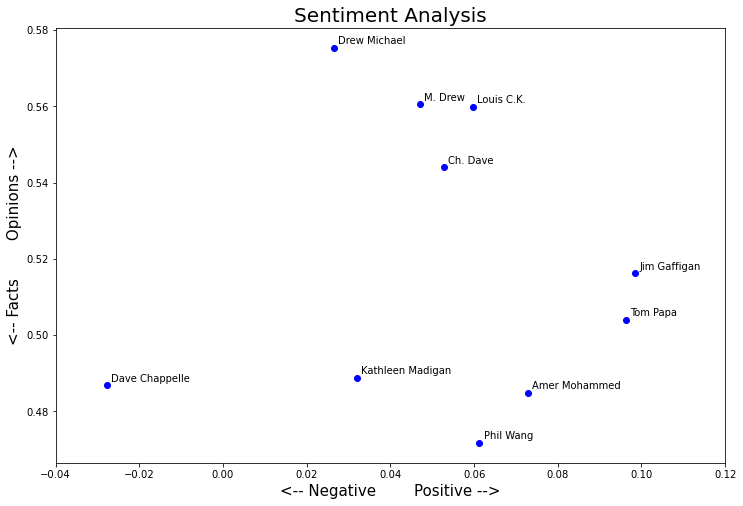

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

for index, comedian in enumerate(df.index):
    x = df['polarity'].loc[comedian]
    y = df['subjectivity'].loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['Full Name'][index], fontsize=10)
    plt.xlim(-.04, .12) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative        Positive -->', fontsize=15)
plt.ylabel('<-- Facts        Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

In [ ]:
import numpy as np

def split_text(text, n=10):
    length = len(text)
    size = length // n 
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [ ]:
list_pieces = []
for t in df['Transcript']:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['[quirky flute music playing]\r\n [single note piano music playing]\r\n Ladies and gentleman.\r\n [cheering]\r\n You can feel excitement in the air. Here we go, Houston, Texas! [cheering] Let’s get this show on the road. Dwayne Johnson here, also known as The Rock, also known as La Roca in Spanish, also known as the sexiest motherfucker alive. It’s not important right now, but what is important that you guys have come together to see one man. The man who hails from a place that many of you know. The Alief area.\r\n [cheering]\r\n Yes. [chuckles] “The SWAT” as we call it. Many amazing people have come out of the Swat. Lizzo, Beyoncé, Travis Scott. [cheering] And one other person, who you guys did not know has come out of the Swat, is the one and only people’s champ, The Rock! [cheering] Well, just for tonight, I’ve come out of the Swat. But tomorrow I’ll be from some place else. Probably Hawaii. Listen, what is important right now, [chuckles] is that I have the honor of introducing th

In [ ]:
len(list_pieces)

10

In [ ]:
len(list_pieces[0])

10

In [ ]:
polarity_text = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_text.append(polarity_piece)
    
polarity_text

[[0.13188728927136176,
  0.022884424603174604,
  0.10767433314866351,
  0.009528226542533779,
  -0.029564536340852127,
  0.008502093144950243,
  0.14168470418470425,
  0.10705279839208409,
  0.09578519988242212,
  0.16116146584896587],
 [0.10038515406162464,
  -0.05888447971781305,
  -0.14488839285714283,
  -0.0998917748917749,
  0.0018796992481203028,
  0.12678997956775737,
  -0.01112310308738881,
  -0.06956845238095238,
  -0.17946286169970382,
  0.03670194003527337],
 [0.0333773903262092,
  0.04295274928153081,
  0.011181773552907583,
  0.017586407805157807,
  0.052003241685366054,
  0.00803373541237619,
  0.0914074417645846,
  0.0196974564236469,
  0.13065360235003093,
  0.10912645461651144],
 [-0.05686741363211952,
  -0.06859307359307358,
  0.05912254010080096,
  0.16551437556154544,
  0.09964359796949082,
  0.16522505272505272,
  0.009015259201826355,
  -0.13172268907563026,
  0.10133893584863413,
  -0.11201545790586888],
 [0.02139346764346766,
  0.23379769455350854,
  -0.02498269

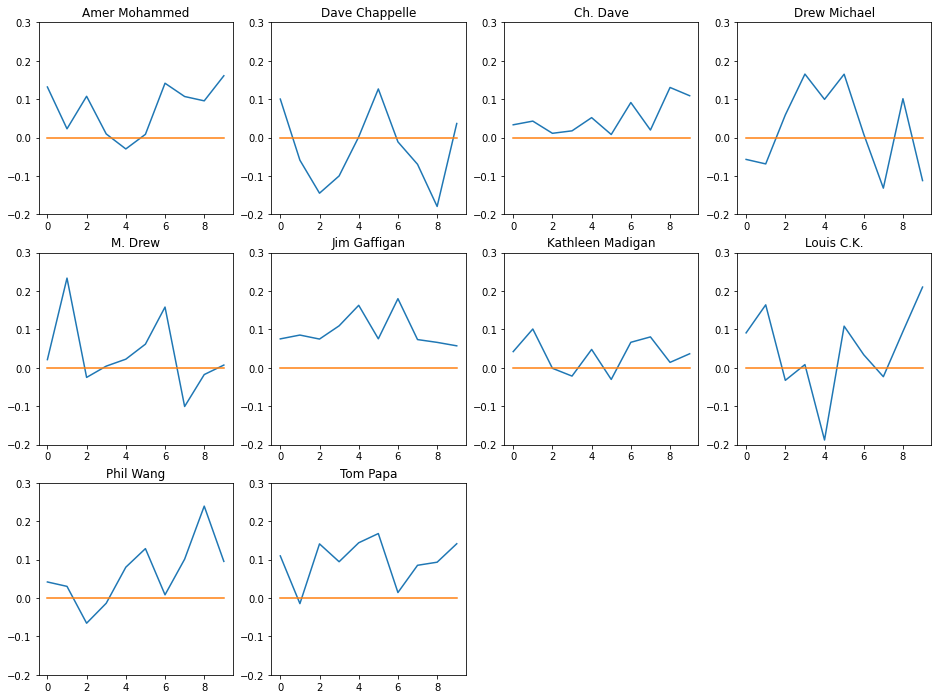

In [ ]:
for index in range(len(df.index)):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_text[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(df['Full Name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.

In [ ]:
df

,Transcript,Full Name,polarity,subjectivity
Amer_Mohammed,[quirky flute music playing]\r\n [single note ...,Amer Mohammed,0.072823,0.484851
Dave_2,"June 6, 2020\r\n 8:46 is a performance special...",Dave Chappelle,-0.027714,0.486892
Dave_Chappelle,[audience murmuring]\r\n [murmuring continues]...,Ch. Dave,0.052754,0.544071
Drew_Michael_1,“This is the latest I’ve stayed up in a long t...,Drew Michael,0.026544,0.575368
Drew_Michael_2,(EMOTIONAL MUSIC PLAYING)\r\n (MUSIC ENDS)\r\n...,M. Drew,0.047073,0.560482
Jim_Gaffigan,"Thank you! Thank you! Oh, my gosh. Thank you s...",Jim Gaffigan,0.098509,0.516245
Kathleen,[chattering]\r\n [man] Whoo!\r\n [chattering]\...,Kathleen Madigan,0.032084,0.488878
Lousi,Recorded at the Madison Square Garden on Augus...,Louis C.K.,0.059700,0.559895
Phil,[hip-hop music playing]\r\n [audience cheering...,Phil Wang,0.061261,0.471710
Tom,aired December 2016\r\n [plodding music]\r\n ♪...,Tom Papa,0.096297,0.504067


In [ ]:
list_pieces = []
for t in df['Transcript']:
    split = split_text(t, 15)
    list_pieces.append(split)
    
list_pieces

[['[quirky flute music playing]\r\n [single note piano music playing]\r\n Ladies and gentleman.\r\n [cheering]\r\n You can feel excitement in the air. Here we go, Houston, Texas! [cheering] Let’s get this show on the road. Dwayne Johnson here, also known as The Rock, also known as La Roca in Spanish, also known as the sexiest motherfucker alive. It’s not important right now, but what is important that you guys have come together to see one man. The man who hails from a place that many of you know. The Alief area.\r\n [cheering]\r\n Yes. [chuckles] “The SWAT” as we call it. Many amazing people have come out of the Swat. Lizzo, Beyoncé, Travis Scott. [cheering] And one other person, who you guys did not know has come out of the Swat, is the one and only people’s champ, The Rock! [cheering] Well, just for tonight, I’ve come out of the Swat. But tomorrow I’ll be from some place else. Probably Hawaii. Listen, what is important right now, [chuckles] is that I have the honor of introducing th

In [ ]:
len(list_pieces)

10

In [ ]:
len(list_pieces[0])

15

In [ ]:
polarity_text = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_text.append(polarity_piece)
    
polarity_text

[[0.1355361969798589,
  0.06935586734693883,
  0.012574884792626728,
  0.11735711416109142,
  0.022079049422799413,
  0.03423191879734851,
  -0.01646703296703297,
  0.016848739495798327,
  -0.052880952380952376,
  0.18184762541380195,
  0.10461309523809523,
  0.08455003330003331,
  0.04465572715572717,
  0.1750487329434697,
  0.17459190115440115],
 [0.012131519274376414,
  0.13094135802469137,
  -0.15899725274725274,
  -0.20097402597402594,
  -0.04464285714285716,
  -0.09431216931216932,
  0.03869047619047619,
  -0.0375,
  0.1827775619442286,
  -0.09204168847025988,
  0.1245535714285714,
  -0.11293995859213249,
  -0.20765306122448982,
  -0.05247208931419458,
  0.05458994708994709],
 [0.05201578384162654,
  0.012661854514533092,
  0.047702810887742385,
  0.03837162837162838,
  -0.04976012793176972,
  0.04746792586498464,
  0.08658498467396594,
  -0.01848162071846282,
  0.011310726310726316,
  0.059483889648363326,
  0.08089176737614237,
  0.012035398629148639,
  0.18107161844003952,
  0

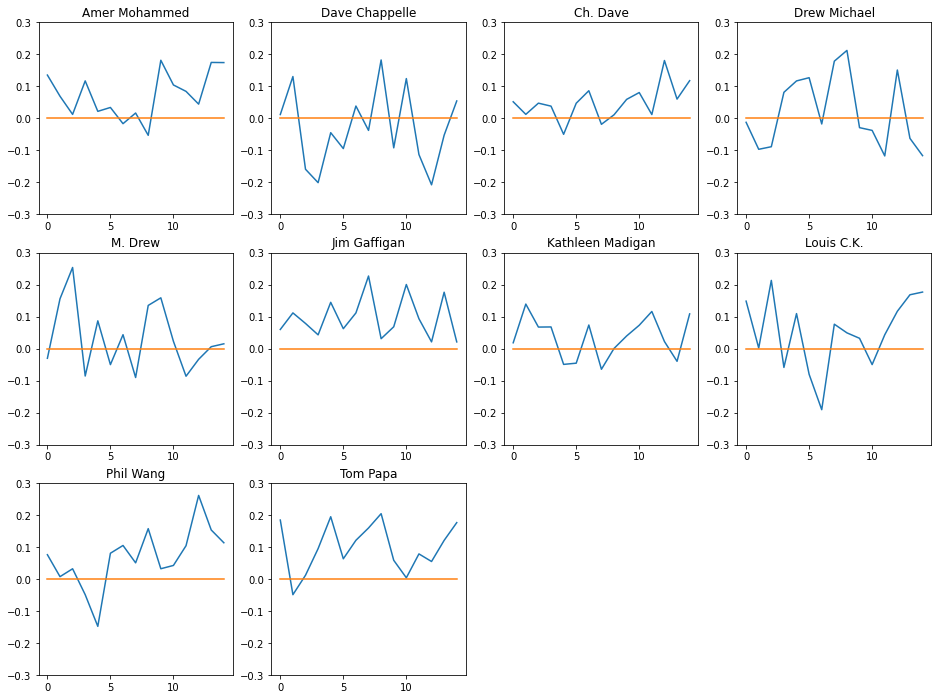

In [ ]:
for index in range(len(df.index)):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_text[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(df['Full Name'][index])
    plt.ylim(ymin=-.3, ymax=.3)
    
plt.show()